In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Load the preprocessed data
df = pd.read_csv("C:/Users/user/Downloads/Project 5/telcom_data (2).xlsx - Sheet1.csv")
user_data = pd.read_csv("C:/Users/user/Downloads/Project 5/telcom_data (2).xlsx - Sheet1.csv")


In [4]:
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


=== Task 1: User Overview Analysis ===

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696

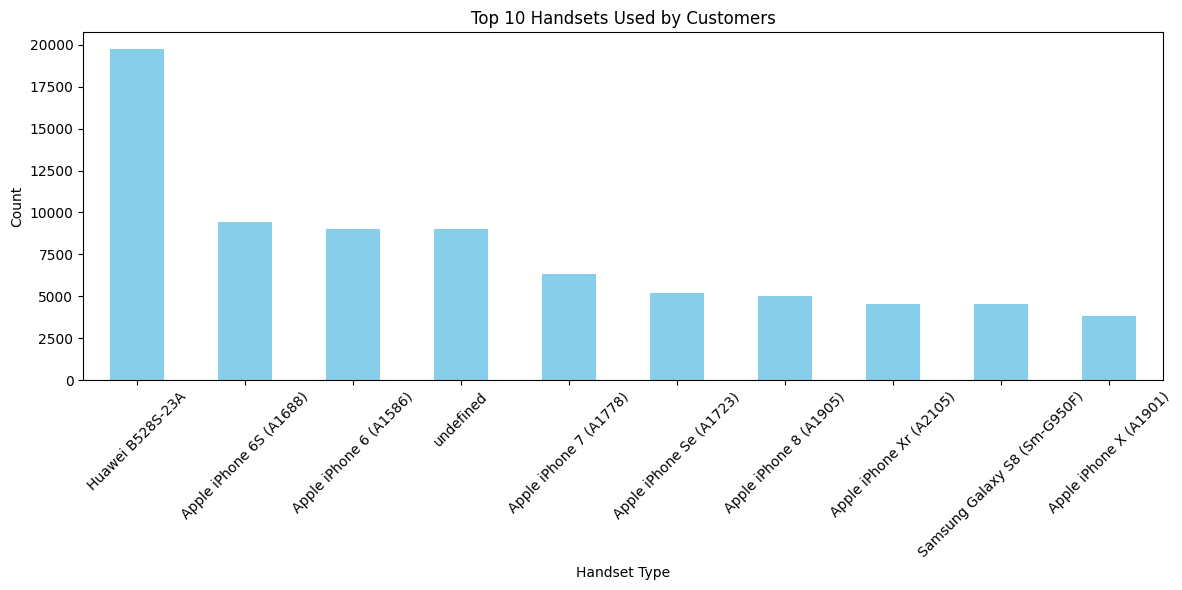

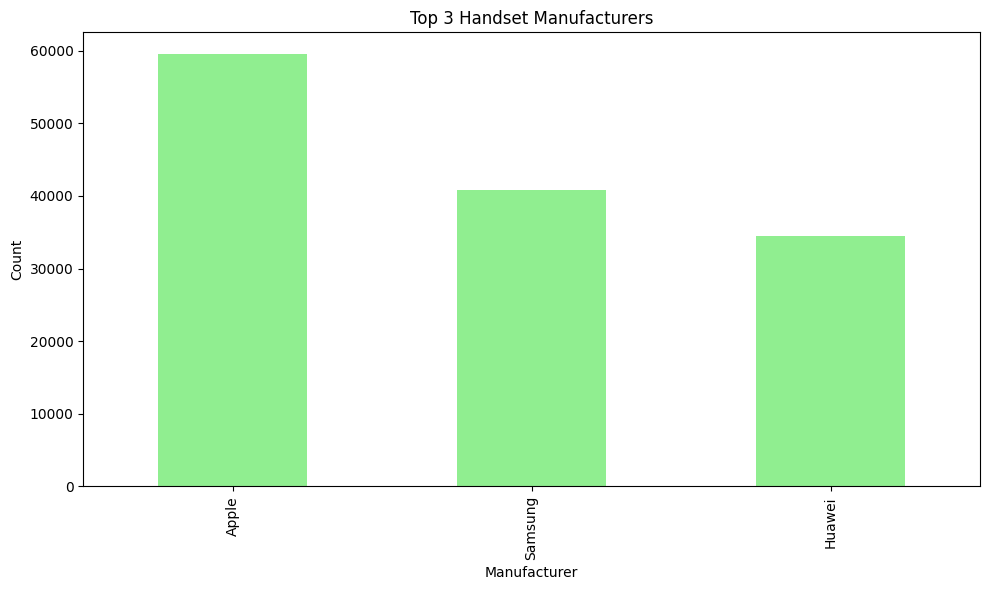

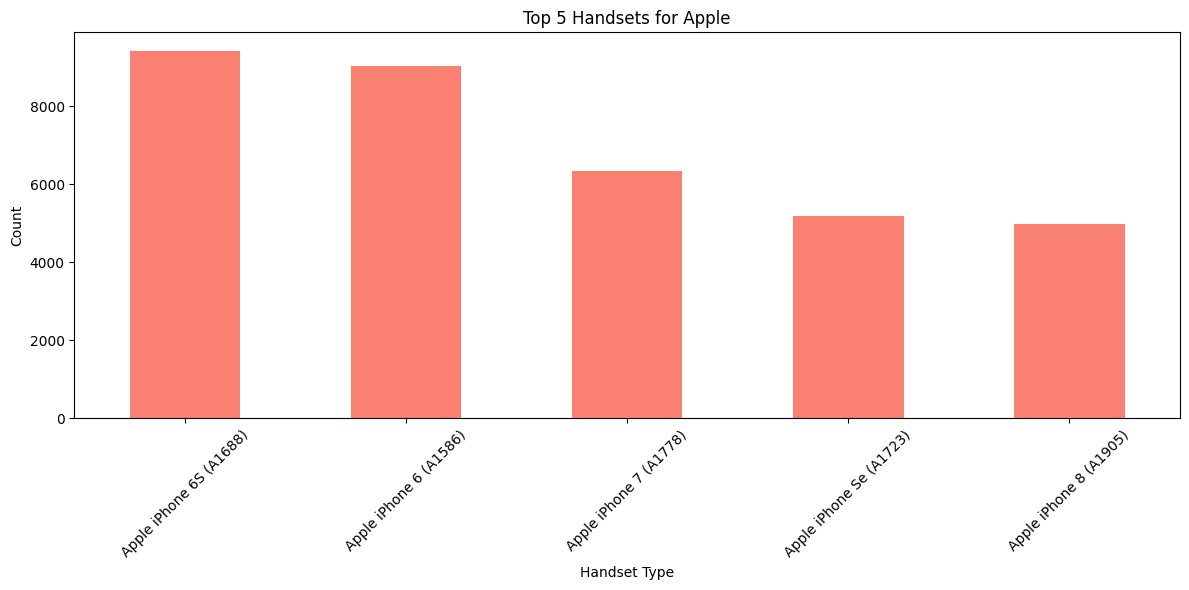

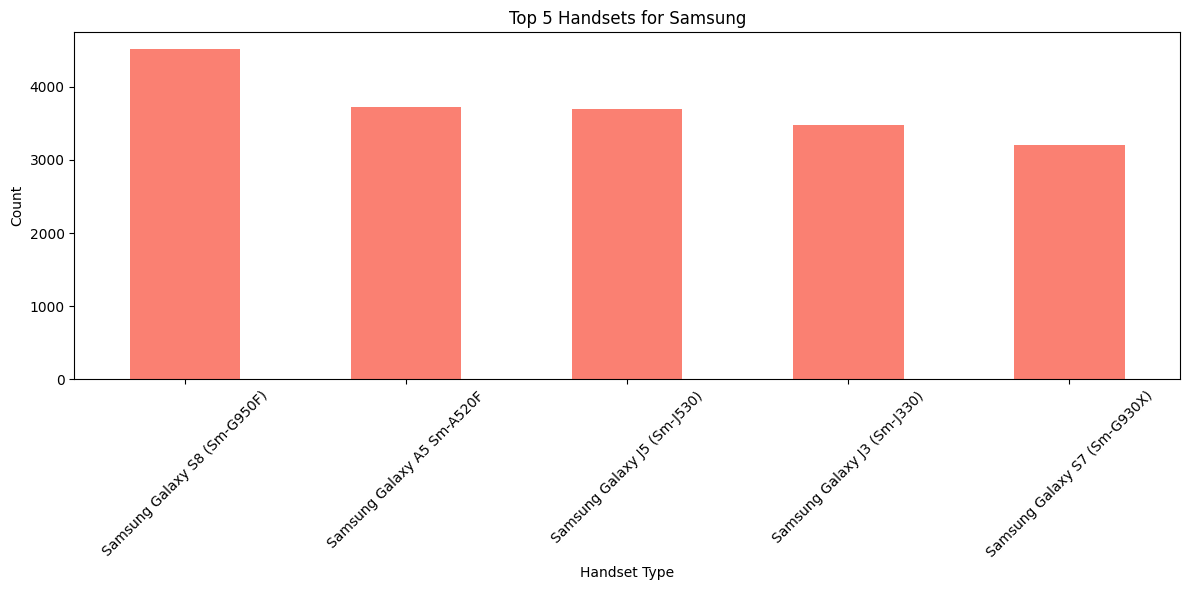

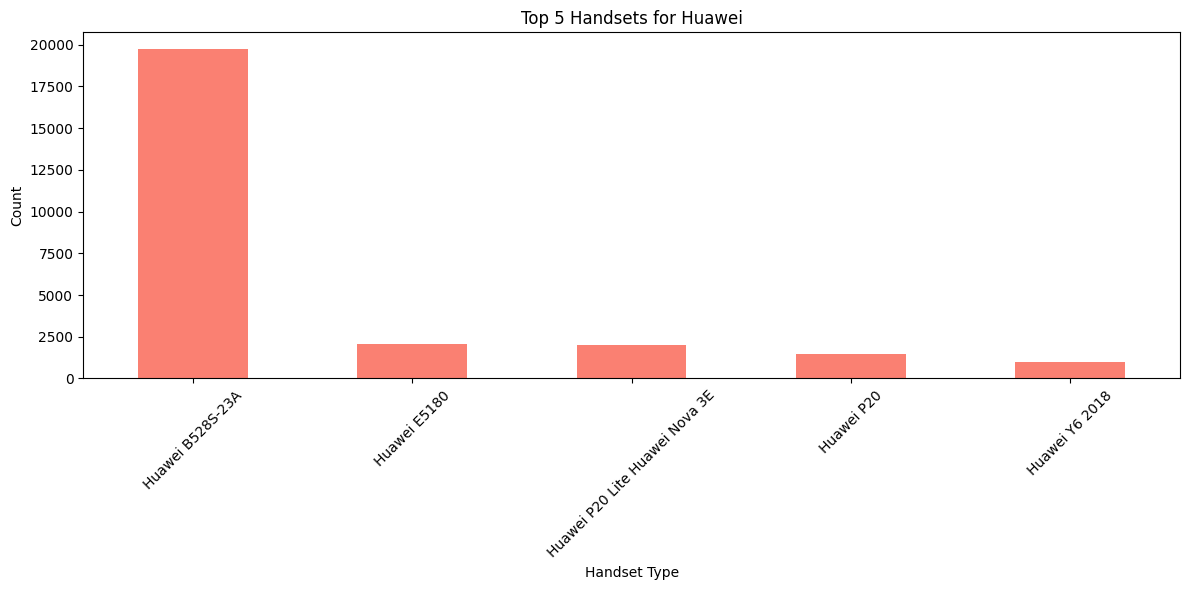

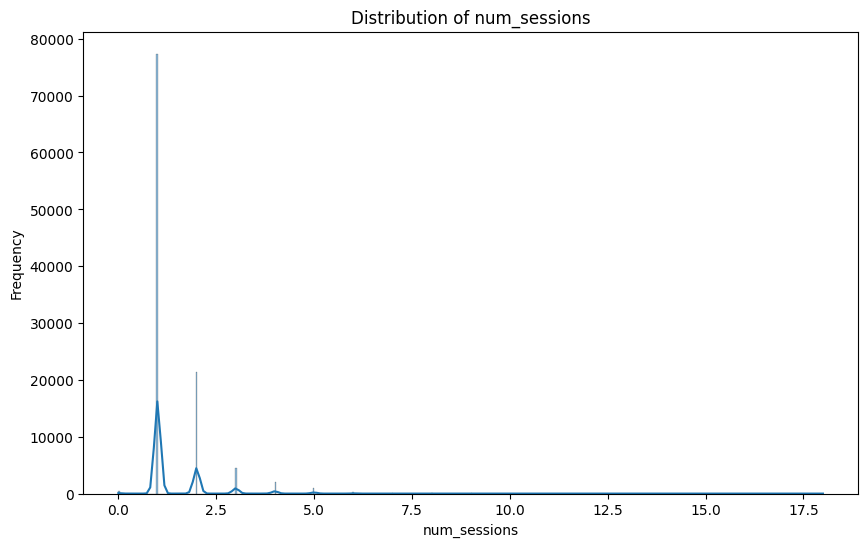

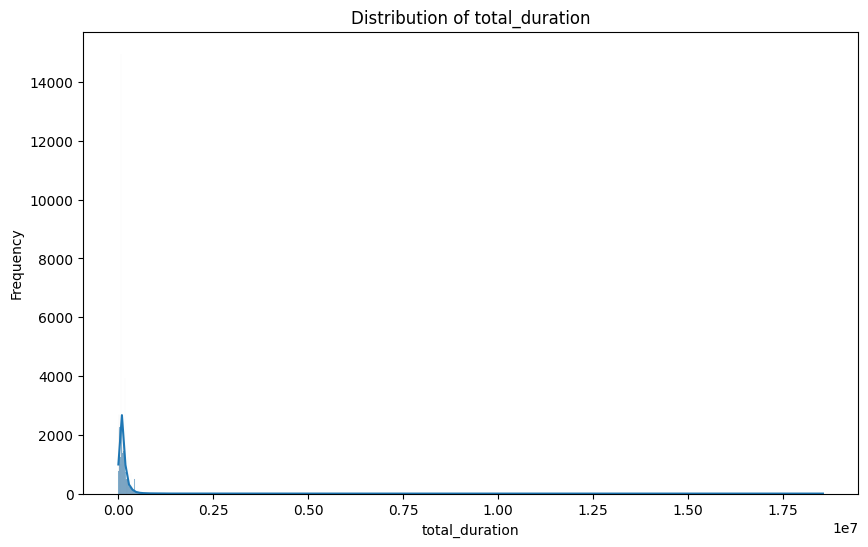

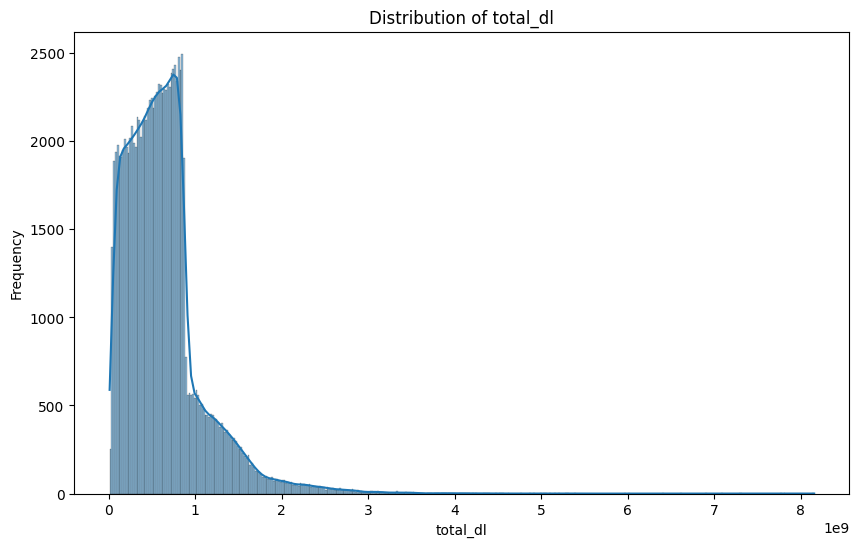

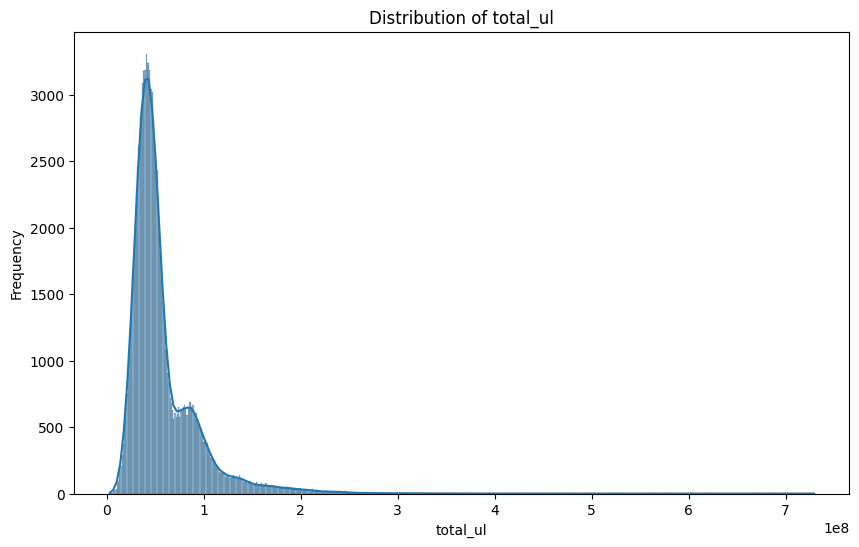

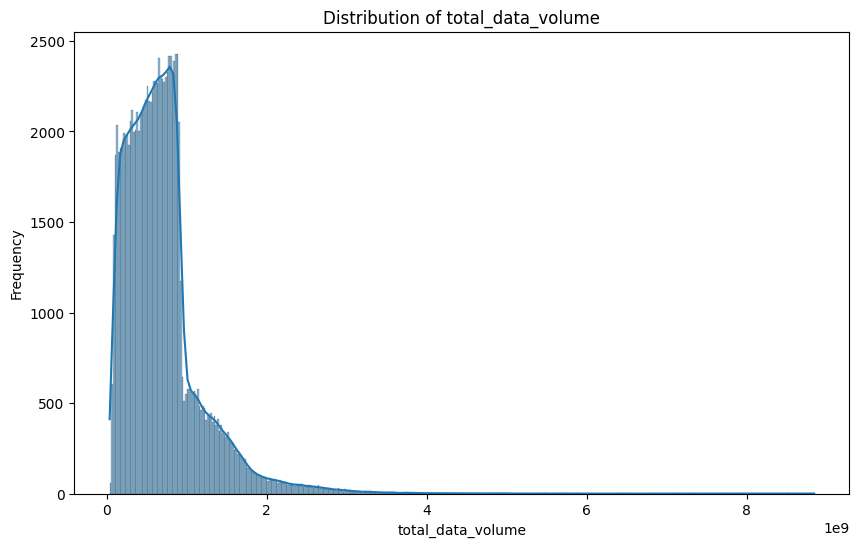

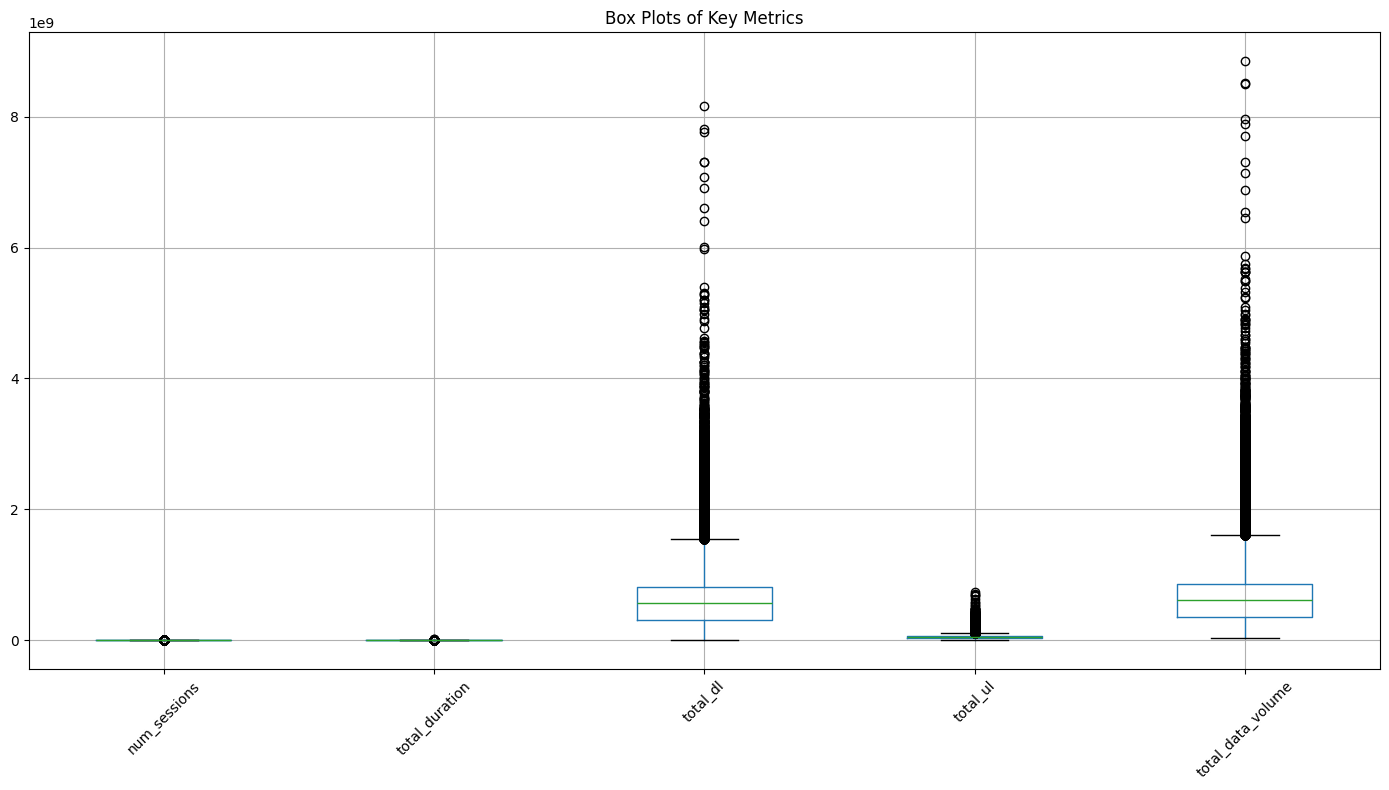

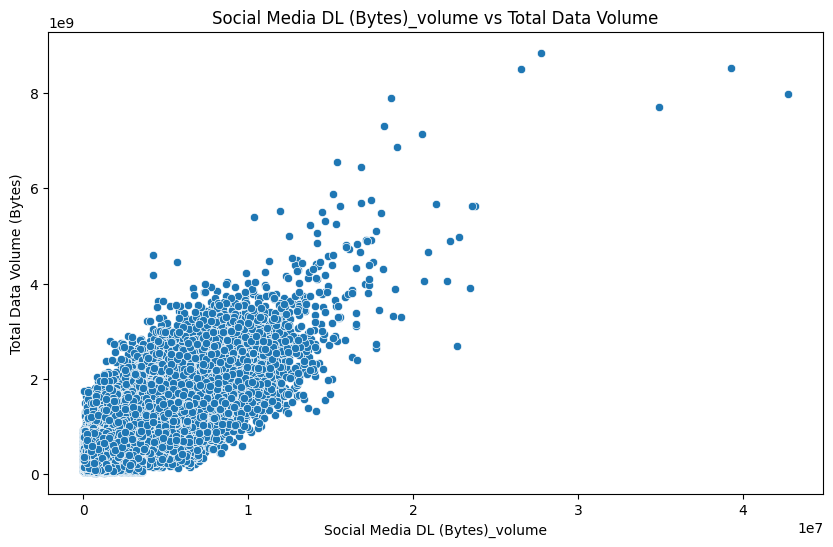

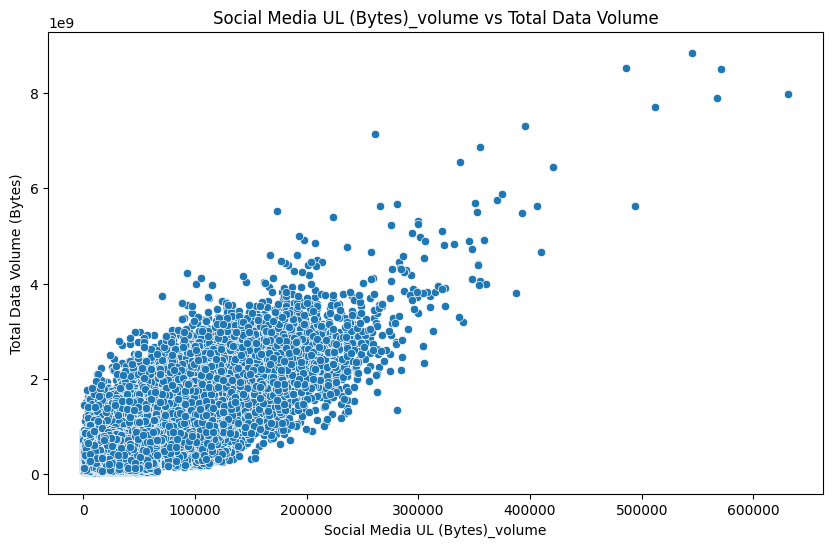

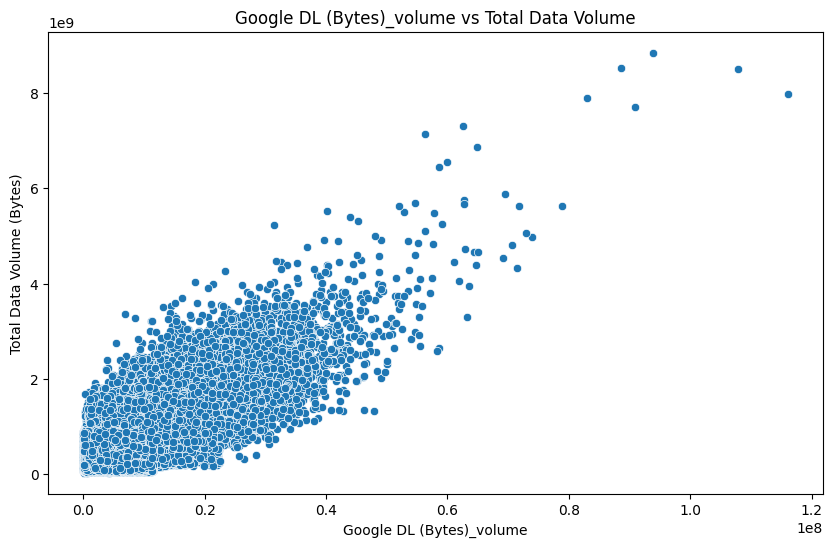

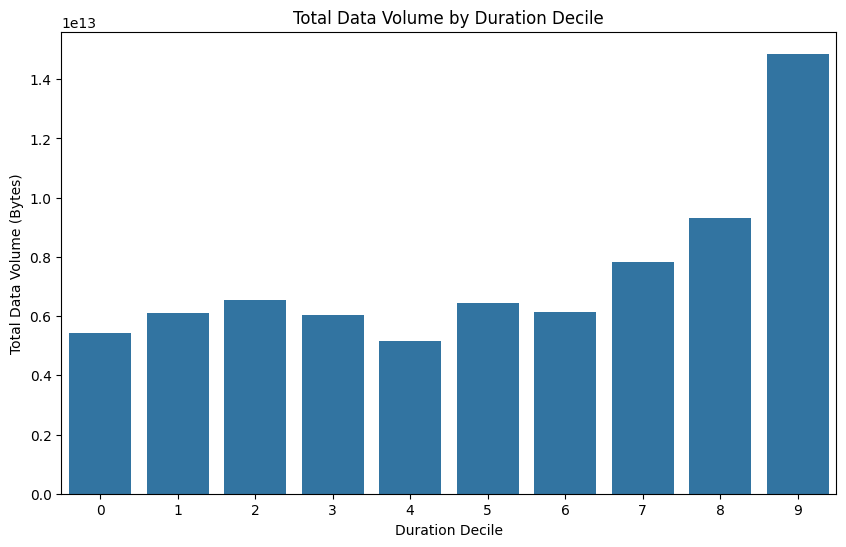

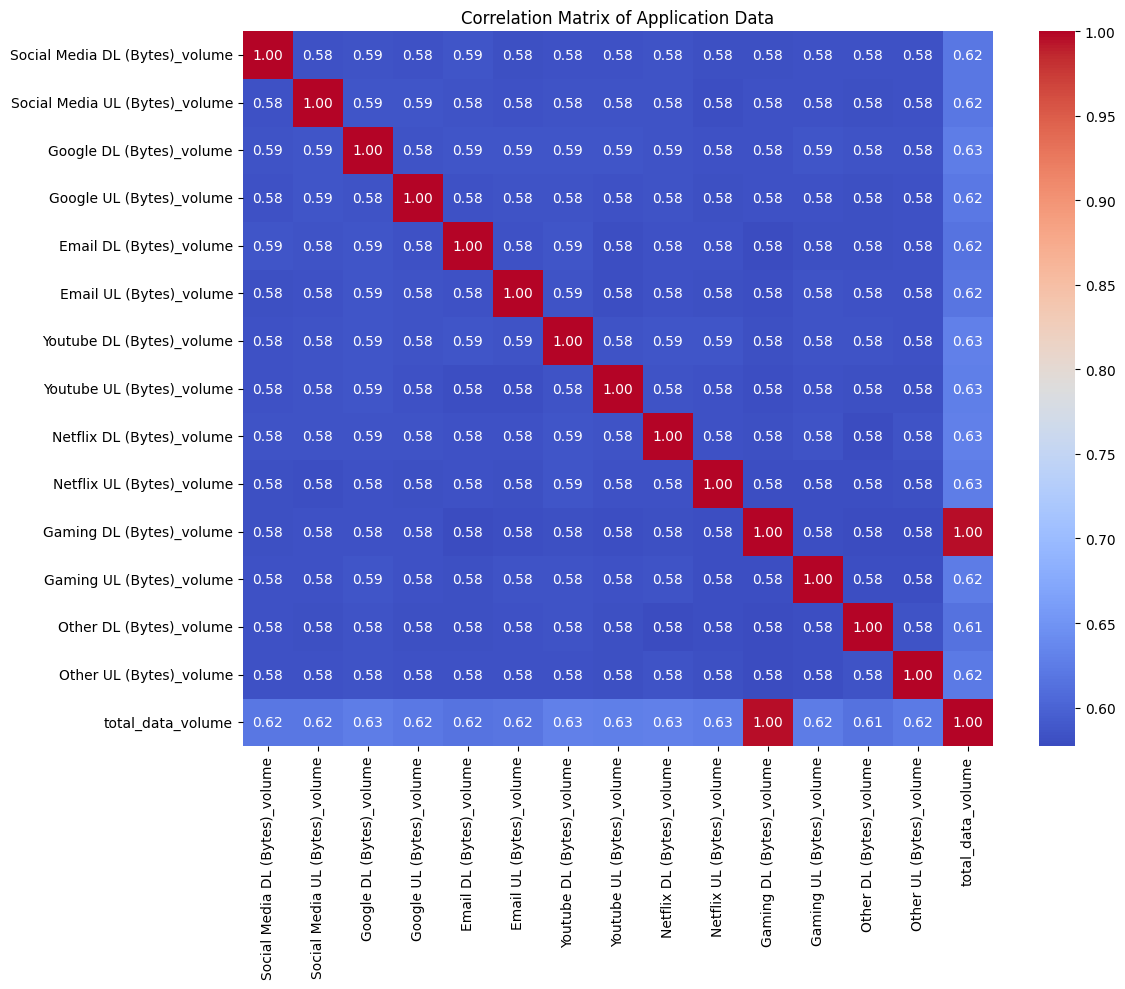

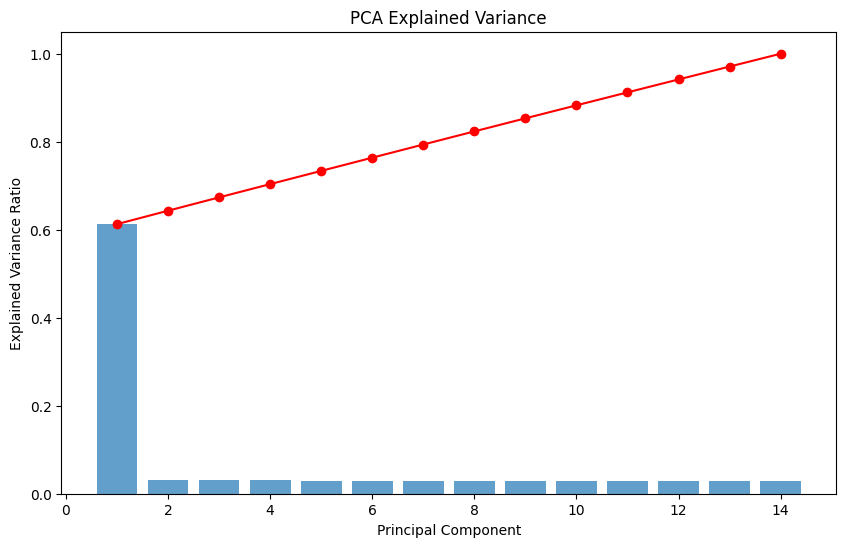

In [5]:
# Task 1 - User Overview Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Task 1 - User Overview Analysis

def handset_analysis(df):
    """
    Analyze handset usage and manufacturers
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    tuple: Top 10 handsets, top 3 manufacturers, top 5 handsets per manufacturer
    """
    # Ensure the handset columns exist
    if 'Handset Type' not in df.columns or 'Handset Manufacturer' not in df.columns:
        print("Error: Handset columns not found in the dataframe")
        return None, None, None
    
    # Top 10 handsets
    top_handsets = df['Handset Type'].value_counts().head(10)
    print("Top 10 Handsets Used by Customers:")
    print(top_handsets)
    
    # Top 3 handset manufacturers
    top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
    print("\nTop 3 Handset Manufacturers:")
    print(top_manufacturers)
    
    # Top 5 handsets per top 3 manufacturer
    top_handsets_per_manufacturer = {}
    for manufacturer in top_manufacturers.index:
        manufacturer_data = df[df['Handset Manufacturer'] == manufacturer]
        top_handsets_per_manufacturer[manufacturer] = manufacturer_data['Handset Type'].value_counts().head(5)
        print(f"\nTop 5 Handsets for {manufacturer}:")
        print(top_handsets_per_manufacturer[manufacturer])
    
    return top_handsets, top_manufacturers, top_handsets_per_manufacturer

def plot_handset_analysis(top_handsets, top_manufacturers, top_handsets_per_manufacturer):
    """
    Plot handset and manufacturer analysis results
    
    Parameters:
    top_handsets: Series of top handsets
    top_manufacturers: Series of top manufacturers
    top_handsets_per_manufacturer: Dict of top handsets per manufacturer
    """
    # Plot top 10 handsets
    plt.figure(figsize=(12, 6))
    top_handsets.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Handsets Used by Customers')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_10_handsets.png')
    
    # Plot top 3 manufacturers
    plt.figure(figsize=(10, 6))
    top_manufacturers.plot(kind='bar', color='lightgreen')
    plt.title('Top 3 Handset Manufacturers')
    plt.xlabel('Manufacturer')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('top_3_manufacturers.png')
    
    # Plot top 5 handsets for each top manufacturer
    for manufacturer, handsets in top_handsets_per_manufacturer.items():
        plt.figure(figsize=(12, 6))
        handsets.plot(kind='bar', color='salmon')
        plt.title(f'Top 5 Handsets for {manufacturer}')
        plt.xlabel('Handset Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'top_5_handsets_{manufacturer}.png')

def user_behavior_overview(df):
    """
    Analyze user behavior through xDR sessions
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: Aggregated user behavior data
    """
    # Ensure necessary columns exist
    required_cols = ['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
    if not all(col in df.columns for col in required_cols):
        print("Error: Required columns not found in the dataframe")
        return None
    
    # List of application columns (assuming they contain these words in their names)
    app_columns = [col for col in df.columns if any(app in col.lower() for app in 
                  ['social', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other'])]
    
    # Aggregate per user
    user_behavior = df.groupby('MSISDN/Number').agg(
        num_sessions=('Bearer Id', 'count'),
        total_duration=('Dur. (ms)', 'sum'),
        total_dl=('Total DL (Bytes)', 'sum'),
        total_ul=('Total UL (Bytes)', 'sum')
    )
    
    # Add total data volume
    user_behavior['total_data_volume'] = user_behavior['total_dl'] + user_behavior['total_ul']
    
    # Add application data if available
    for app_col in app_columns:
        if app_col in df.columns:
            user_behavior[f'{app_col}_volume'] = df.groupby('MSISDN/Number')[app_col].sum()
    
    # Reset index to make MSISDN a column
    user_behavior.reset_index(inplace=True)
    
    return user_behavior

def exploratory_data_analysis(user_behavior):
    """
    Conduct EDA on aggregated user data
    
    Parameters:
    user_behavior (pandas.DataFrame): Aggregated user behavior data
    """
    # Description of all relevant variables
    print("Data Types of Variables:")
    print(user_behavior.dtypes)
    
    # Basic metrics analysis
    print("\nBasic Metrics:")
    print(user_behavior.describe())
    
    # Non-graphical univariate analysis
    print("\nDispersion Parameters:")
    for col in user_behavior.select_dtypes(include=['float64', 'int64']).columns:
        if col != 'MSISDN/Number':
            variance = user_behavior[col].var()
            std_dev = user_behavior[col].std()
            range_val = user_behavior[col].max() - user_behavior[col].min()
            print(f"{col}: Variance={variance:.2f}, Std Dev={std_dev:.2f}, Range={range_val:.2f}")
    
    # Graphical univariate analysis
    numeric_cols = user_behavior.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col != 'MSISDN/Number']
    
    # Histograms
    for col in numeric_cols[:5]:  # Limit to first 5 columns for brevity
        plt.figure(figsize=(10, 6))
        sns.histplot(user_behavior[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.savefig(f'hist_{col}.png')
    
    # Box plots
    plt.figure(figsize=(14, 8))
    user_behavior[numeric_cols[:5]].boxplot()
    plt.title('Box Plots of Key Metrics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplots.png')
    
    # Bivariate analysis - relationship with total data
    app_columns = [col for col in user_behavior.columns if any(app in col.lower() for app in 
                   ['social', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other'])]
    
    # Scatter plots for application data vs total data
    for app_col in app_columns[:3]:  # Limit to first 3 for brevity
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=app_col, y='total_data_volume', data=user_behavior)
        plt.title(f'{app_col} vs Total Data Volume')
        plt.xlabel(app_col)
        plt.ylabel('Total Data Volume (Bytes)')
        plt.savefig(f'scatter_{app_col}.png')
    
    # Variable transformations - segment users into deciles
    user_behavior['duration_decile'] = pd.qcut(user_behavior['total_duration'], 10, labels=False)
    decile_stats = user_behavior.groupby('duration_decile')['total_data_volume'].sum().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='duration_decile', y='total_data_volume', data=decile_stats)
    plt.title('Total Data Volume by Duration Decile')
    plt.xlabel('Duration Decile')
    plt.ylabel('Total Data Volume (Bytes)')
    plt.savefig('decile_analysis.png')
    
    # Correlation analysis
    correlation_columns = [col for col in app_columns] + ['total_data_volume']
    corr_matrix = user_behavior[correlation_columns].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Application Data')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    
    print("\nCorrelation Matrix:")
    print(corr_matrix)
    
    # Dimensionality reduction - PCA
    pca_columns = [col for col in app_columns]
    if pca_columns:
        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(user_behavior[pca_columns])
        
        # Apply PCA
        pca = PCA()
        pca_result = pca.fit_transform(scaled_data)
        
        # PCA explained variance
        explained_variance = pca.explained_variance_ratio_
        
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
        plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 'r-o')
        plt.title('PCA Explained Variance')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.savefig('pca_variance.png')
        
        print("\nPCA Explained Variance Ratio:")
        print(explained_variance)
        
        # PCA interpretation
        print("\nPCA Interpretation:")
        print("• The first PC captures the most variance, indicating it's the most important pattern.")
        print("• Applications with high coefficients in the first PC are the main drivers of data usage.")
        print("• Clusters in the first two PCs represent user segments with similar application usage.")
        print("• Dimensionality reduction allows us to visualize complex relationships in the data.")

def main():
    """
    Main function for Task 1
    """
    print("=== Task 1: User Overview Analysis ===\n")
    
    # Perform handset analysis
    top_handsets, top_manufacturers, top_handsets_per_manufacturer = handset_analysis(df)
    
    # Plot handset analysis results
    if top_handsets is not None and top_manufacturers is not None and top_handsets_per_manufacturer is not None:
        plot_handset_analysis(top_handsets, top_manufacturers, top_handsets_per_manufacturer)
    
    # Generate marketing recommendations
    print("\nRecommendations for Marketing Teams:")
    print("1. Focus on the top 3 manufacturers for partnership opportunities.")
    print("2. Create targeted promotions for the most popular handset types.")
    print("3. Develop manufacturer-specific marketing campaigns highlighting their top models.")
    print("4. Consider offering special data plans customized for the most common handsets.")
    
    # Perform user behavior overview analysis
    user_behavior = user_behavior_overview(df)
    
    # Perform exploratory data analysis
    if user_behavior is not None:
        exploratory_data_analysis(user_behavior)
        
        # Save the aggregated user behavior data
        user_behavior.to_csv("user_behavior_data.csv", index=False)

if __name__ == "__main__":
    main()

In [6]:
# Task 2 - User Engagement Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


def analyze_engagement_metrics(user_data):
    """
    Analyze user engagement metrics
    
    Parameters:
    user_data (pandas.DataFrame): User behavior data
    
    Returns:
    tuple: Engagement metrics, normalized metrics, and clusters
    """
    # Define engagement metrics
    engagement_metrics = ['num_sessions', 'total_duration', 'total_data_volume']
    
    # Ensure all metrics are present
    for metric in engagement_metrics:
        if metric not in user_data.columns:
            print(f"Error: {metric} column not found in the dataframe")
            return None, None, None
    
    # Display top 10 customers per engagement metric
    print("Top 10 Customers by Session Frequency:")
    print(user_data.nlargest(10, 'num_sessions')[['MSISDN/Number', 'num_sessions']])
    
    print("\nTop 10 Customers by Session Duration:")
    print(user_data.nlargest(10, 'total_duration')[['MSISDN/Number', 'total_duration']])
    
    print("\nTop 10 Customers by Total Traffic:")
    print(user_data.nlargest(10, 'total_data_volume')[['MSISDN/Number', 'total_data_volume']])
    
    # Normalize engagement metrics for clustering
    scaler = StandardScaler()
    normalized_metrics = pd.DataFrame(
        scaler.fit_transform(user_data[engagement_metrics]),
        columns=engagement_metrics
    )
    
    # Run k-means clustering with k=3
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(normalized_metrics)
    
    # Add cluster labels to the dataframe
    user_data['engagement_cluster'] = clusters
    
    # Compute metrics for each cluster
    cluster_stats = user_data.groupby('engagement_cluster').agg({
        'num_sessions': ['min', 'max', 'mean', 'sum'],
        'total_duration': ['min', 'max', 'mean', 'sum'],
        'total_data_volume': ['min', 'max', 'mean', 'sum']
    })
    
    print("\nCluster Statistics:")
    print(cluster_stats)
    
    return user_data, normalized_metrics, clusters

def visualize_engagement_clusters(user_data, normalized_metrics):
    """
    Visualize engagement clusters
    
    Parameters:
    user_data (pandas.DataFrame): User behavior data with cluster labels
    normalized_metrics (pandas.DataFrame): Normalized engagement metrics
    """
    # Add cluster labels to normalized metrics
    normalized_metrics['cluster'] = user_data['engagement_cluster']
    
    # Create a 3D scatter plot of engagement metrics colored by cluster
    engagement_metrics = ['num_sessions', 'total_duration', 'total_data_volume']
    
    # 2D scatter plots for pairs of metrics
    metric_pairs = [
        ('num_sessions', 'total_duration'),
        ('num_sessions', 'total_data_volume'),
        ('total_duration', 'total_data_volume')
    ]
    
    for x_metric, y_metric in metric_pairs:
        plt.figure(figsize=(10, 8))
        for cluster in range(3):
            cluster_data = normalized_metrics[normalized_metrics['cluster'] == cluster]
            plt.scatter(
                cluster_data[x_metric], 
                cluster_data[y_metric], 
                alpha=0.7, 
                label=f'Cluster {cluster}'
            )
        plt.title(f'Engagement Clusters: {x_metric} vs {y_metric}')
        plt.xlabel(x_metric)
        plt.ylabel(y_metric)
        plt.legend()
        plt.grid(True)
        plt.savefig(f'engagement_cluster_{x_metric}_{y_metric}.png')
    
    # Create a radar chart for cluster centroids
    centroids = user_data.groupby('engagement_cluster')[engagement_metrics].mean()
    
    # Scale the centroids for radar chart
    min_vals = user_data[engagement_metrics].min()
    max_vals = user_data[engagement_metrics].max()
    scaled_centroids = (centroids - min_vals) / (max_vals - min_vals)
    
    # Number of variables
    categories = engagement_metrics
    N = len(categories)
    
    # Create angle for each variable
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Draw the centroids for each cluster
    for i in range(3):
        values = scaled_centroids.iloc[i].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)
    
    plt.title('Engagement Cluster Profiles', size=15)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.savefig('engagement_cluster_radar.png')

def analyze_application_engagement(user_data):
    """
    Analyze user engagement per application
    
    Parameters:
    user_data (pandas.DataFrame): User behavior data
    """
    # Identify application columns
    app_columns = [col for col in user_data.columns if any(app in col.lower() for app in 
                   ['social', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other'])]
    
    if not app_columns:
        print("Error: No application columns found in the dataframe")
        return
    
    # Display top 10 engaged users per application
    for app_col in app_columns:
        print(f"\nTop 10 Users by {app_col} Usage:")
        print(user_data.nlargest(10, app_col)[['MSISDN/Number', app_col]])
    
    # Calculate total traffic per application
    app_traffic = user_data[app_columns].sum().sort_values(ascending=False)
    
    print("\nTotal Traffic per Application:")
    print(app_traffic)
    
    # Plot the top 3 most used applications
    top_apps = app_traffic.head(3)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_apps.index, y=top_apps.values)
    plt.title('Top 3 Most Used Applications')
    plt.xlabel('Application')
    plt.ylabel('Total Traffic (Bytes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_3_applications.png')
    
    # Pie chart of application usage
    plt.figure(figsize=(12, 12))
    plt.pie(app_traffic, labels=app_traffic.index, autopct='%1.1f%%', shadow=True, explode=[0.1 if i < 3 else 0 for i in range(len(app_traffic))])
    plt.title('Application Usage Distribution')
    plt.savefig('application_usage_pie.png')

def determine_optimal_k(normalized_metrics):
    """
    Determine the optimal number of clusters using the elbow method
    
    Parameters:
    normalized_metrics (pandas.DataFrame): Normalized engagement metrics
    """
    # Calculate inertia for different values of k
    inertia = []
    silhouette_scores = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(normalized_metrics)
        inertia.append(kmeans.inertia_)
        
        # Calculate silhouette score
        if k > 1:  # Silhouette score requires at least 2 clusters
            silhouette_scores.append(silhouette_score(normalized_metrics, kmeans.labels_))
    
    # Plot the elbow method
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, inertia, 'bo-')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.savefig('elbow_method.png')
    

=== Task 3: User Experience Analysis ===

Experience metrics aggregated for 106856 users

Top 10 TCP Retransmission Values:
   MSISDN/Number  avg_tcp_retransmission
0   3.360100e+10                     0.0
1   3.360100e+10                     0.0
2   3.360100e+10                     0.0
3   3.360101e+10                     0.0
4   3.360101e+10                     0.0
5   3.360101e+10                     0.0
6   3.360101e+10                     0.0
7   3.360101e+10                     0.0
8   3.360101e+10                     0.0
9   3.360102e+10                     0.0

Bottom 10 TCP Retransmission Values:
   MSISDN/Number  avg_tcp_retransmission
0   3.360100e+10                     0.0
1   3.360100e+10                     0.0
2   3.360100e+10                     0.0
3   3.360101e+10                     0.0
4   3.360101e+10                     0.0
5   3.360101e+10                     0.0
6   3.360101e+10                     0.0
7   3.360101e+10                     0.0
8   3.360101e+10  

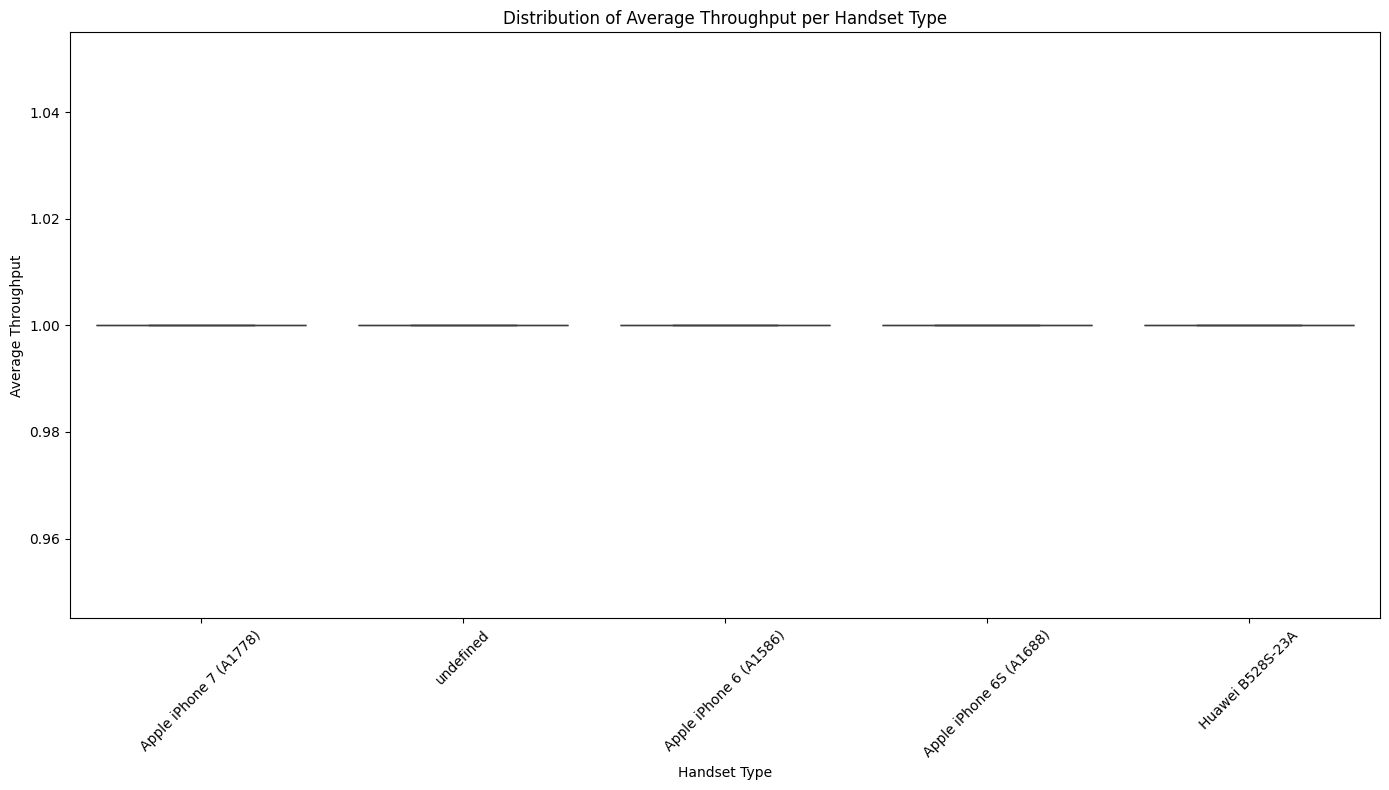

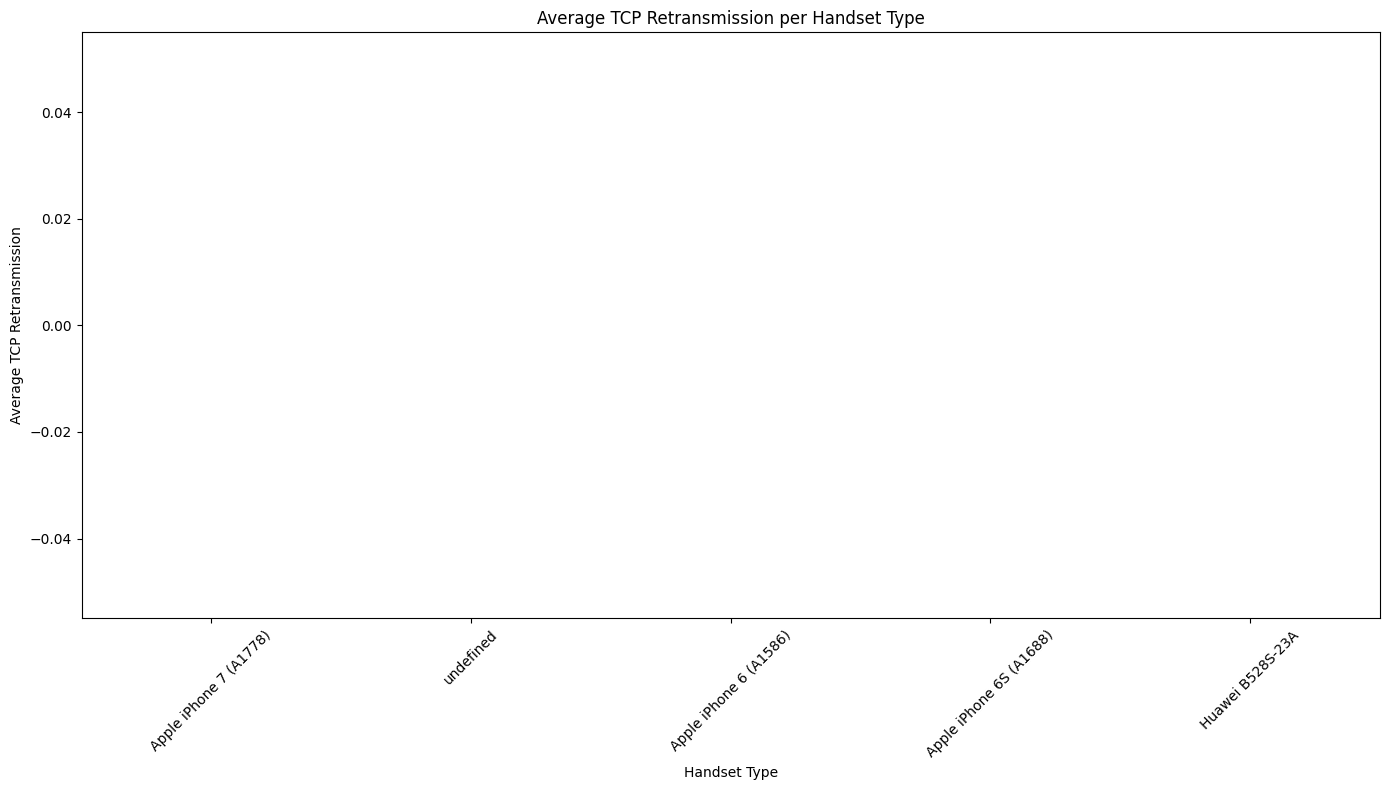

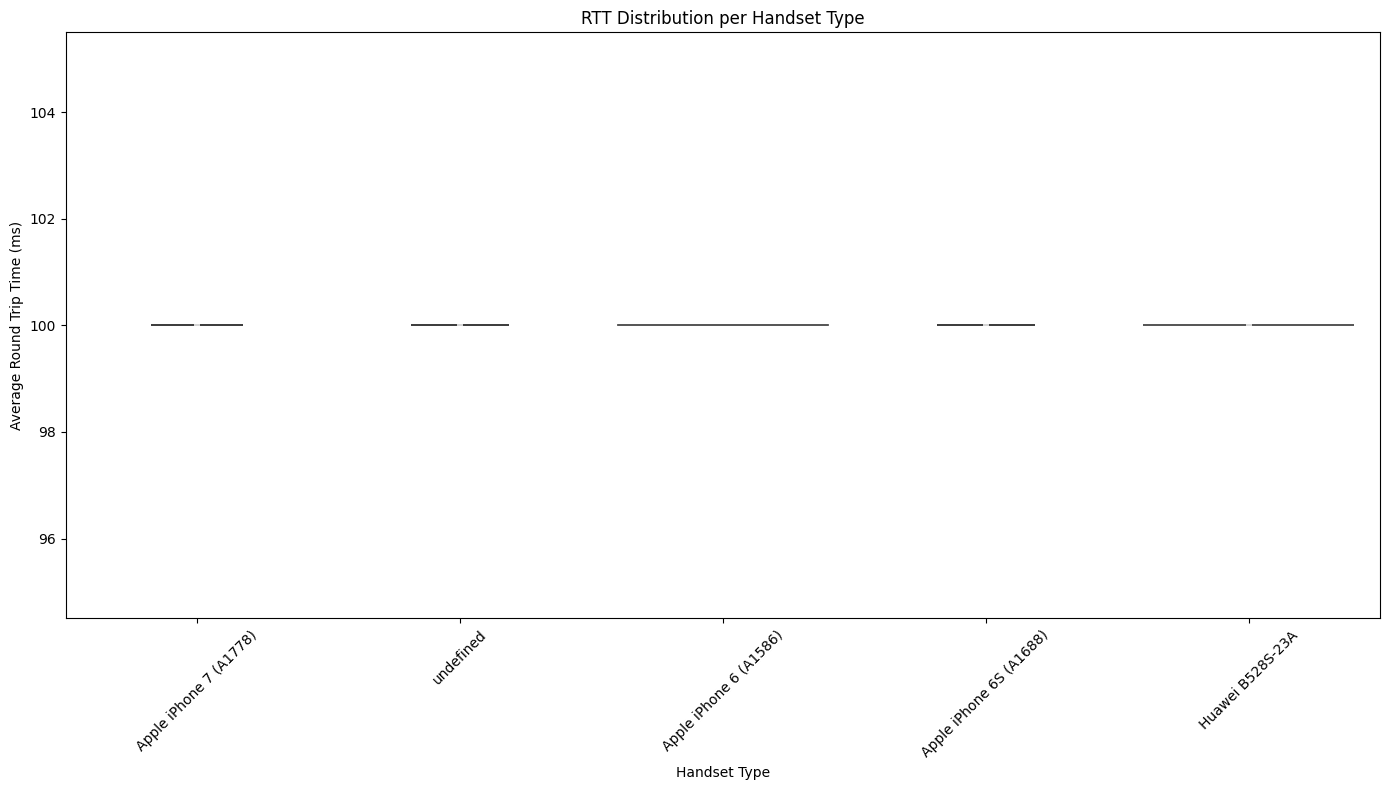

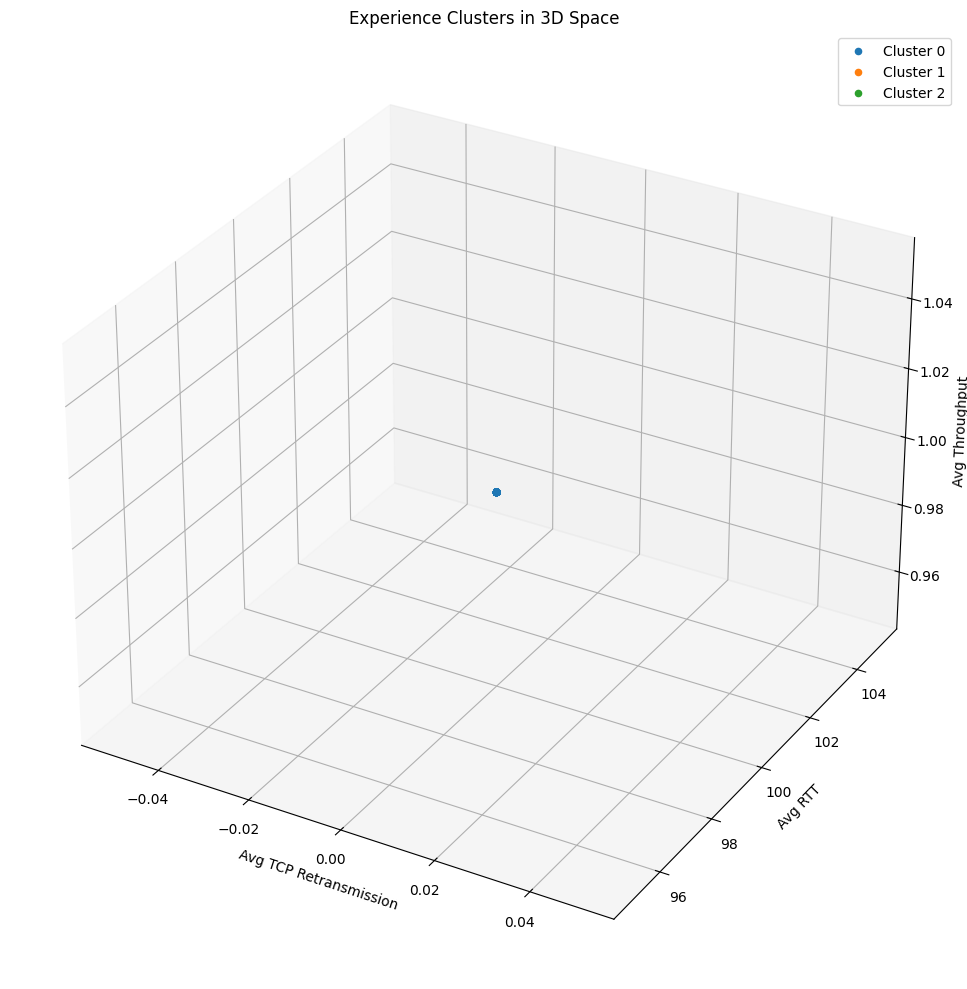

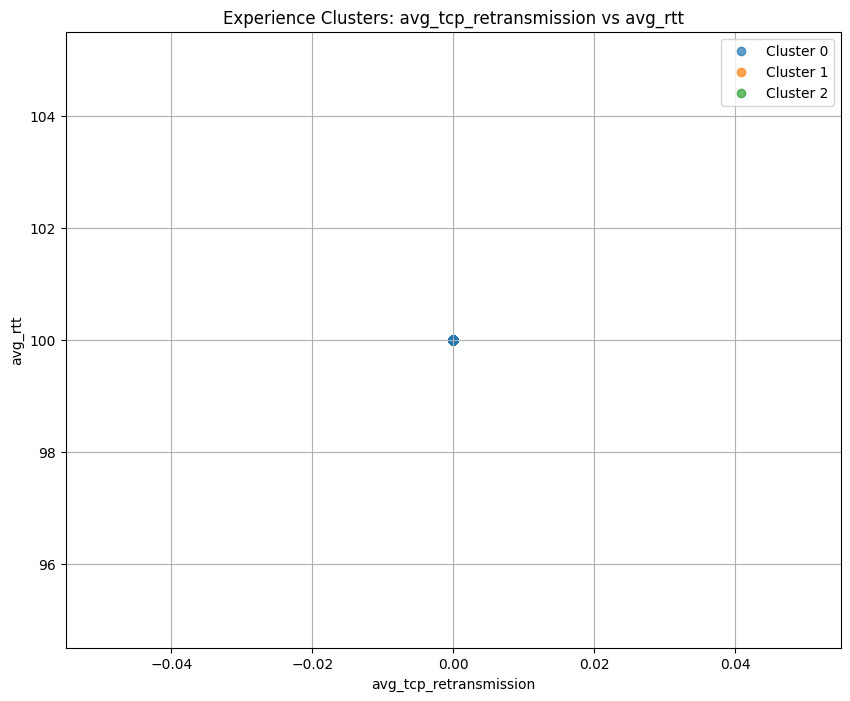

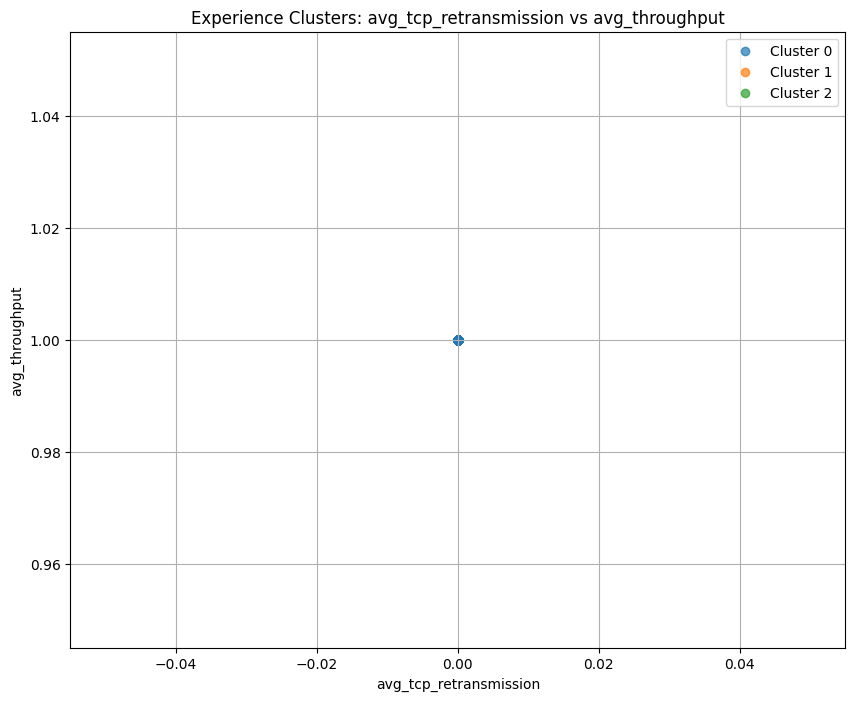

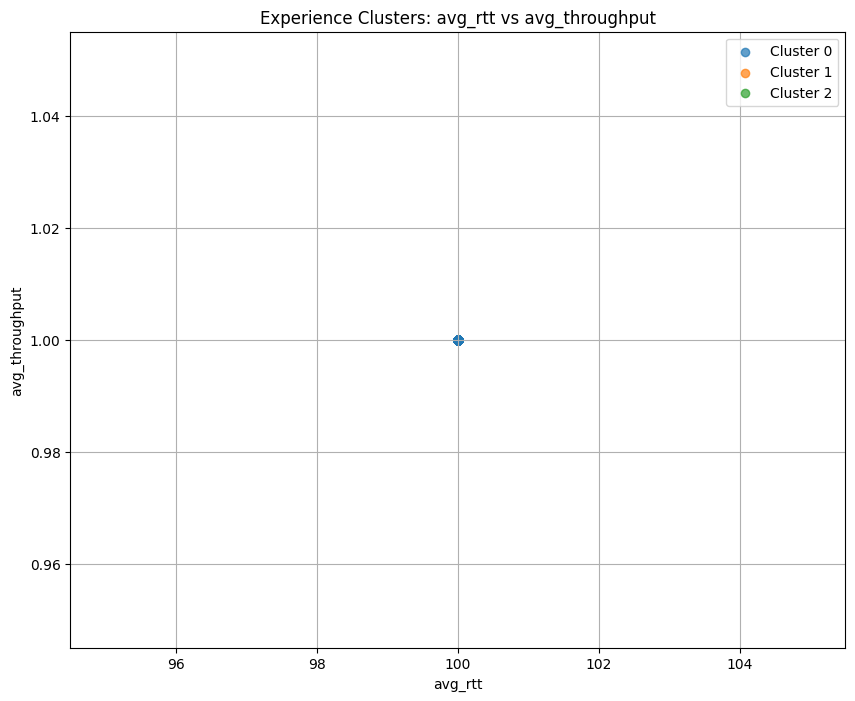

In [9]:
# Task 3 - User Experience Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


def aggregate_experience_metrics(df):
    """
    Aggregate experience metrics per customer
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: Aggregated experience metrics
    """
    # Ensure necessary columns exist
    required_cols = ['MSISDN/Number', 'TCP retransmission', 'RTT', 'Handset Type', 'Throughput']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"Error: The following required columns are missing: {missing_cols}")
        # Try to map to potential alternative column names
        col_map = {
            'TCP retransmission': ['TCP Retransmission', 'TCP_retransmission', 'TCP_Retransmission'],
            'RTT': ['Round Trip Time', 'Round_Trip_Time', 'RoundTripTime'],
            'Throughput': ['Data_Throughput', 'Data Throughput', 'Throughput_kbps']
        }
        
        for missing_col in missing_cols:
            if missing_col in col_map:
                for alt_col in col_map[missing_col]:
                    if alt_col in df.columns:
                        print(f"Using {alt_col} instead of {missing_col}")
                        df[missing_col] = df[alt_col]
                        break
    
    # Check again after attempting to fix missing columns
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Still missing required columns: {missing_cols}")
        # Create placeholder columns with default values
        for col in missing_cols:
            if col == 'TCP retransmission':
                df[col] = 0.0
            elif col == 'RTT':
                df[col] = 100.0  # Default RTT in ms
            elif col == 'Throughput':
                df[col] = 1.0  # Default throughput
            elif col == 'Handset Type':
                df[col] = 'Unknown'
    
    # Handle missing values and outliers
    numeric_cols = ['TCP retransmission', 'RTT', 'Throughput']
    for col in numeric_cols:
        if col in df.columns:
            # Replace missing values with mean
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            
            # Handle outliers using IQR method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with mean
            mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            if mask.sum() > 0:
                df.loc[mask, col] = mean_val
    
    # Handle missing Handset Type values with mode
    if 'Handset Type' in df.columns and df['Handset Type'].isnull().sum() > 0:
        mode_val = df['Handset Type'].mode()[0]
        df['Handset Type'].fillna(mode_val, inplace=True)
    
    # Aggregate per customer
    exp_metrics = df.groupby('MSISDN/Number').agg(
        avg_tcp_retransmission=('TCP retransmission', 'mean'),
        avg_rtt=('RTT', 'mean'),
        avg_throughput=('Throughput', 'mean')
    )
    
    # Add most frequent handset type per user
    if 'Handset Type' in df.columns:
        handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
        exp_metrics['handset_type'] = handset_mode
    
    # Reset index to make MSISDN a column
    exp_metrics.reset_index(inplace=True)
    
    print(f"Experience metrics aggregated for {exp_metrics.shape[0]} users")
    
    return exp_metrics

def analyze_top_bottom_metrics(exp_metrics):
    """
    Analyze top and bottom experience metrics
    
    Parameters:
    exp_metrics (pandas.DataFrame): Aggregated experience metrics
    """
    # Top and bottom TCP retransmission values
    print("\nTop 10 TCP Retransmission Values:")
    print(exp_metrics.nlargest(10, 'avg_tcp_retransmission')[['MSISDN/Number', 'avg_tcp_retransmission']])
    
    print("\nBottom 10 TCP Retransmission Values:")
    print(exp_metrics.nsmallest(10, 'avg_tcp_retransmission')[['MSISDN/Number', 'avg_tcp_retransmission']])
    
    # Top and bottom RTT values
    print("\nTop 10 RTT Values:")
    print(exp_metrics.nlargest(10, 'avg_rtt')[['MSISDN/Number', 'avg_rtt']])
    
    print("\nBottom 10 RTT Values:")
    print(exp_metrics.nsmallest(10, 'avg_rtt')[['MSISDN/Number', 'avg_rtt']])
    
    # Top and bottom throughput values
    print("\nTop 10 Throughput Values:")
    print(exp_metrics.nlargest(10, 'avg_throughput')[['MSISDN/Number', 'avg_throughput']])
    
    print("\nBottom 10 Throughput Values:")
    print(exp_metrics.nsmallest(10, 'avg_throughput')[['MSISDN/Number', 'avg_throughput']])
    
    # Most frequent values
    print("\nMost Frequent TCP Retransmission Values:")
    print(exp_metrics['avg_tcp_retransmission'].value_counts().head(5))
    
    print("\nMost Frequent RTT Values:")
    print(exp_metrics['avg_rtt'].value_counts().head(5))
    
    print("\nMost Frequent Throughput Values:")
    print(exp_metrics['avg_throughput'].value_counts().head(5))
    
    if 'handset_type' in exp_metrics.columns:
        print("\nMost Frequent Handset Types:")
        print(exp_metrics['handset_type'].value_counts().head(10))

def analyze_distributions(exp_metrics):
    """
    Analyze distributions of experience metrics
    
    Parameters:
    exp_metrics (pandas.DataFrame): Aggregated experience metrics
    """
    # Check if handset_type column exists
    if 'handset_type' not in exp_metrics.columns:
        print("Error: handset_type column not found")
        return
    
    # Get top 5 handset types for analysis
    top_handsets = exp_metrics['handset_type'].value_counts().head(5).index.tolist()
    
    # Filter data to include only top handsets
    filtered_exp = exp_metrics[exp_metrics['handset_type'].isin(top_handsets)]
    
    # Distribution of throughput per handset type
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='handset_type', y='avg_throughput', data=filtered_exp)
    plt.title('Distribution of Average Throughput per Handset Type')
    plt.xlabel('Handset Type')
    plt.ylabel('Average Throughput')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('throughput_per_handset.png')
    
    print("\nInterpretation of Throughput Distribution:")
    print("- The boxplot shows the variation in throughput across different handset types.")
    print("- Higher median throughput indicates better performance for data-intensive applications.")
    print("- Wide interquartile range suggests inconsistent performance within a handset type.")
    
    # Average TCP retransmission per handset type
    plt.figure(figsize=(14, 8))
    sns.barplot(x='handset_type', y='avg_tcp_retransmission', data=filtered_exp)
    plt.title('Average TCP Retransmission per Handset Type')
    plt.xlabel('Handset Type')
    plt.ylabel('Average TCP Retransmission')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('tcp_retransmission_per_handset.png')
    
    print("\nInterpretation of TCP Retransmission:")
    print("- Lower TCP retransmission rates indicate better network stability and reliability.")
    print("- Handsets with higher retransmission rates may have connectivity issues or hardware limitations.")
    print("- This metric directly impacts user experience, especially for real-time applications.")
    
    # RTT distribution per handset type
    plt.figure(figsize=(14, 8))
    sns.violinplot(x='handset_type', y='avg_rtt', data=filtered_exp)
    plt.title('RTT Distribution per Handset Type')
    plt.xlabel('Handset Type')
    plt.ylabel('Average Round Trip Time (ms)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('rtt_per_handset.png')
    
    print("\nInterpretation of RTT Distribution:")
    print("- Lower RTT values indicate faster response times and better user experience.")
    print("- The shape of the violin plot shows the distribution density of RTT values.")
    print("- Wide violins at the bottom suggest many users experience low latency with that handset type.")

def cluster_user_experiences(exp_metrics):
    """
    Cluster users based on experience metrics
    
    Parameters:
    exp_metrics (pandas.DataFrame): Aggregated experience metrics
    
    Returns:
    pandas.DataFrame: Experience metrics with cluster labels
    """
    # Define experience metrics for clustering
    experience_cols = ['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']
    
    # Ensure all metrics are present
    for col in experience_cols:
        if col not in exp_metrics.columns:
            print(f"Error: {col} column not found in the dataframe")
            return None
    
    # Normalize the metrics for clustering
    scaler = StandardScaler()
    normalized_metrics = pd.DataFrame(
        scaler.fit_transform(exp_metrics[experience_cols]),
        columns=experience_cols
    )
    
    # Run k-means clustering with k=3
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(normalized_metrics)
    
    # Add cluster labels to the dataframe
    exp_metrics['experience_cluster'] = clusters
    
    # Compute metrics for each cluster
    cluster_stats = exp_metrics.groupby('experience_cluster').agg({
        'avg_tcp_retransmission': ['min', 'max', 'mean'],
        'avg_rtt': ['min', 'max', 'mean'],
        'avg_throughput': ['min', 'max', 'mean']
    })
    
    print("\nExperience Cluster Statistics:")
    print(cluster_stats)
    
    # Describe the clusters based on their characteristics
    print("\nCluster Descriptions:")
    
    # Determine the best and worst clusters based on metrics
    cluster_means = exp_metrics.groupby('experience_cluster')[experience_cols].mean()
    
    # Lower values are better for TCP retransmission and RTT, higher is better for throughput
    normalized_means = cluster_means.copy()
    normalized_means['avg_tcp_retransmission'] = -normalized_means['avg_tcp_retransmission']  # Invert so higher is better
    normalized_means['avg_rtt'] = -normalized_means['avg_rtt']  # Invert so higher is better
    
    # Calculate overall score
    cluster_scores = normalized_means.sum(axis=1)
    best_cluster = cluster_scores.idxmax()
    worst_cluster = cluster_scores.idxmin()
    
    for cluster in range(3):
        if cluster == best_cluster:
            print(f"Cluster {cluster}: Best Experience - Low TCP retransmission and RTT, high throughput")
        elif cluster == worst_cluster:
            print(f"Cluster {cluster}: Poor Experience - High TCP retransmission and RTT, low throughput")
        else:
            print(f"Cluster {cluster}: Average Experience - Moderate values across all metrics")
    
    # Visualize the clusters
    # 3D scatter plot (save coordinates for dashboard)
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each cluster
    for cluster in range(3):
        cluster_data = exp_metrics[exp_metrics['experience_cluster'] == cluster]
        ax.scatter(
            cluster_data['avg_tcp_retransmission'],
            cluster_data['avg_rtt'],
            cluster_data['avg_throughput'],
            label=f'Cluster {cluster}'
        )
    
    ax.set_xlabel('Avg TCP Retransmission')
    ax.set_ylabel('Avg RTT')
    ax.set_zlabel('Avg Throughput')
    ax.set_title('Experience Clusters in 3D Space')
    plt.legend()
    plt.tight_layout()
    plt.savefig('experience_clusters_3d.png')
    
    # 2D scatter plots for pairs of metrics
    metrics_pairs = [
        ('avg_tcp_retransmission', 'avg_rtt'),
        ('avg_tcp_retransmission', 'avg_throughput'),
        ('avg_rtt', 'avg_throughput')
    ]
    
    for x_metric, y_metric in metrics_pairs:
        plt.figure(figsize=(10, 8))
        for cluster in range(3):
            cluster_data = exp_metrics[exp_metrics['experience_cluster'] == cluster]
            plt.scatter(
                cluster_data[x_metric],
                cluster_data[y_metric],
                alpha=0.7,
                label=f'Cluster {cluster}'
            )
        plt.title(f'Experience Clusters: {x_metric} vs {y_metric}')
        plt.xlabel(x_metric)
        plt.ylabel(y_metric)
        plt.legend()
        plt.grid(True)
        plt.savefig(f'experience_cluster_{x_metric}_{y_metric}.png')
    
    return exp_metrics

def main():
    """
    Main function for Task 3
    """
    print("=== Task 3: User Experience Analysis ===\n")
    
    # Aggregate experience metrics per customer
    exp_metrics = aggregate_experience_metrics(df)
    
    if exp_metrics is not None:
        # Analyze top and bottom metrics
        analyze_top_bottom_metrics(exp_metrics)
        
        # Analyze distributions
        analyze_distributions(exp_metrics)
        
        # Cluster user experiences
        exp_metrics = cluster_user_experiences(exp_metrics)
        
        if exp_metrics is not None:
            # Save the experience metrics with cluster labels
            exp_metrics.to_csv("user_experience_data.csv", index=False)
            
            print("\nTask 3 completed successfully!")

if __name__ == "__main__":
    main()

In [8]:
# Task 4 - User Satisfaction Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mysql.connector
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')


def assign_scores(engagement_df, experience_df):
    """
    Assign engagement and experience scores to users
    
    Parameters:
    engagement_df (pandas.DataFrame): User engagement data with cluster labels
    experience_df (pandas.DataFrame): User experience data with cluster labels
    
    Returns:
    pandas.DataFrame: Combined dataframe with scores
    """
    # Ensure both dataframes have the required columns
    if 'engagement_cluster' not in engagement_df.columns:
        print("Error: engagement_cluster column not found in engagement dataframe")
        return None
    
    if 'experience_cluster' not in experience_df.columns:
        print("Error: experience_cluster column not found in experience dataframe")
        return None
    
    # Determine the least engaged cluster (highest cluster number typically means least engaged)
    engagement_means = engagement_df.groupby('engagement_cluster')[
        ['num_sessions', 'total_duration', 'total_data_volume']
    ].mean()
    
    # Calculate engagement level for each cluster (sum of normalized means)
    engagement_level = engagement_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0).sum(axis=1)
    least_engaged_cluster = engagement_level.idxmin()
    
    print(f"Least engaged cluster: {least_engaged_cluster}")
    
    # Determine the worst experience cluster
    experience_means = experience_df.groupby('experience_cluster')[
        ['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']
    ].mean()
    
    # For experience, lower is better for TCP retransmission and RTT, higher is better for throughput
    normalized_means = experience_means.copy()
    normalized_means['avg_tcp_retransmission'] = -normalized_means['avg_tcp_retransmission']  # Invert so higher is better
    normalized_means['avg_rtt'] = -normalized_means['avg_rtt']  # Invert so higher is better
    
    # Calculate overall score
    experience_level = normalized_means.sum(axis=1)
    worst_experience_cluster = experience_level.idxmin()
    
    print(f"Worst experience cluster: {worst_experience_cluster}")
    
    # Create a copy of both dataframes to avoid modifying the originals
    engagement_scored = engagement_df.copy()
    experience_scored = experience_df.copy()
    
    # Extract features for calculating Euclidean distance
    engagement_features = ['num_sessions', 'total_duration', 'total_data_volume']
    experience_features = ['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']
    
    # Normalize the features
    scaler_eng = StandardScaler()
    scaler_exp = StandardScaler()
    
    engagement_normalized = scaler_eng.fit_transform(engagement_df[engagement_features])
    experience_normalized = scaler_exp.fit_transform(experience_df[experience_features])
    
    # Get the centroid of the least engaged cluster
    least_engaged_centroid = engagement_normalized[engagement_df['engagement_cluster'] == least_engaged_cluster].mean(axis=0)
    
    # Get the centroid of the worst experience cluster
    worst_experience_centroid = experience_normalized[experience_df['experience_cluster'] == worst_experience_cluster].mean(axis=0)
    
    # Calculate Euclidean distance to the least engaged cluster for each user
    engagement_scored['engagement_score'] = np.sqrt(
        np.sum((engagement_normalized - least_engaged_centroid)**2, axis=1)
    )
    
    # Calculate Euclidean distance to the worst experience cluster for each user
    experience_scored['experience_score'] = np.sqrt(
        np.sum((experience_normalized - worst_experience_centroid)**2, axis=1)
    )
    
    # Normalize the scores to a 0-100 scale for better interpretation
    min_eng_score = engagement_scored['engagement_score'].min()
    max_eng_score = engagement_scored['engagement_score'].max()
    engagement_scored['engagement_score'] = 100 * (engagement_scored['engagement_score'] - min_eng_score) / (max_eng_score - min_eng_score)
    
    min_exp_score = experience_scored['experience_score'].min()
    max_exp_score = experience_scored['experience_score'].max()
    experience_scored['experience_score'] = 100 * (experience_scored['experience_score'] - min_exp_score) / (max_exp_score - min_exp_score)
    
    # Merge the two dataframes on MSISDN/Number
    combined_df = pd.merge(
        engagement_scored[['MSISDN/Number', 'engagement_score', 'engagement_cluster'] + engagement_features],
        experience_scored[['MSISDN/Number', 'experience_score', 'experience_cluster'] + experience_features],
        on='MSISDN/Number',
        how='inner'
    )
    
    print(f"Combined dataframe has {combined_df.shape[0]} users with both engagement and experience scores")
    
    return combined_df

def calculate_satisfaction_score(combined_df):
    """
    Calculate satisfaction score as the average of engagement and experience scores
    
    Parameters:
    combined_df (pandas.DataFrame): Combined dataframe with engagement and experience scores
    
    Returns:
    pandas.DataFrame: Dataframe with satisfaction scores
    """
    # Ensure both score columns exist
    if 'engagement_score' not in combined_df.columns or 'experience_score' not in combined_df.columns:
        print("Error: Score columns not found in the dataframe")
        return None
    
    # Calculate satisfaction score as the average of engagement and experience scores
    combined_df['satisfaction_score'] = (combined_df['engagement_score'] + combined_df['experience_score']) / 2
    
    # Display top 10 satisfied customers
    print("\nTop 10 Satisfied Customers:")
    top_satisfied = combined_df.nlargest(10, 'satisfaction_score')
    print(top_satisfied[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']])
    
    # Plot the distribution of satisfaction scores
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['satisfaction_score'], kde=True)
    plt.title('Distribution of Satisfaction Scores')
    plt.xlabel('Satisfaction Score')
    plt.ylabel('Frequency')
    plt.savefig('satisfaction_score_distribution.png')
    
    # Plot engagement vs experience scores colored by satisfaction
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(
        combined_df['engagement_score'],
        combined_df['experience_score'],
        c=combined_df['satisfaction_score'],
        cmap='viridis',
        alpha=0.7
    )
    plt.colorbar(scatter, label='Satisfaction Score')
    plt.title('Engagement vs Experience Scores')
    plt.xlabel('Engagement Score')
    plt.ylabel('Experience Score')
    plt.grid(True)
    plt.savefig('engagement_vs_experience.png')
    
    return combined_df

def build_satisfaction_model(combined_df):
    """
    Build a regression model to predict satisfaction scores
    
    Parameters:
    combined_df (pandas.DataFrame): Dataframe with satisfaction scores
    
    Returns:
    tuple: Fitted model, feature importances, and prediction metrics
    """
    # Define features and target variable
    features = [
        'num_sessions', 'total_duration', 'total_data_volume',
        'avg_tcp_retransmission', 'avg_rtt', 'avg_throughput'
    ]
    
    target = 'satisfaction_score'
    
    # Ensure all required columns exist
    for col in features + [target]:
        if col not in combined_df.columns:
            print(f"Error: {col} column not found in the dataframe")
            return None, None, None
    
    # Split the data into training and testing sets
    X = combined_df[features]
    y = combined_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build a Random Forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Performance Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    
    # Get feature importances
    feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance for Satisfaction Score Prediction')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    
    # Track model details for MLOps
    model_info = {
        'code_version': '1.0',
        'start_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'features': features,
        'target': target,
        'model_type': 'RandomForestRegressor',
        'parameters': {
            'n_estimators': 100,
            'random_state': 42
        },
        'metrics': {
            'mse': mse,
            'r2': r2
        },
        'end_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    